## Import Library

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('Dataset/Convert Resumes/')

['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday']

## Extract Text From Datasets

In [44]:
file_path1 = []
category1 = []
directory1 = 'Dataset/Convert Resumes/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))))
        category1.append('Peoplesoft')
    

In [45]:
data1 = pd.DataFrame(data = file_path1, columns = ['Details'])
# data1['category1'] = category1
data1

,Details
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...
1,b'G. Ananda Rayudu \n\n\t\t https://www....
2,b'PeopleSoft Database Administrator\n\n ...
3,b'Classification: Internal\n\nClassification: ...
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,..."
5,"b""SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n..."
6,"b""PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS..."
7,"b""PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCar..."
8,b'Vinod Akkala ...
9,"b""PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanes..."


In [46]:
file_path2 = []
category2 = []
directory2 = 'Dataset/Convert Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))))
        category2.append('React JS Developer')

In [47]:
data2 = pd.DataFrame(data = file_path2, columns = ['Details'])
# data2['category2'] = category2
data2

,Details
0,b'Name: Ravali P \n\n\n\n ...
1,b'SUSOVAN BAG \n\nSeeking a challenging ...
2,b'Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREE...
3,b'HARIPRIYA BATTINA \n\nExperience as UI Devel...
4,b'KAMALAKAR REDDY. A \n\nLinked In: https://ww...
5,b'Ui-Developer/ React JS Developer \n\nNAME: K...
6,b'Ui-Developer/ React JS Developer \n\nNAME: K...
7,b'Naveen Sadhu\n\n\n\n\n\nTitle: software deve...
8,b'FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER...
9,b'PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertis...


In [48]:
file_path3 = []
category3 = []
directory3 = 'Dataset/Convert Resumes/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))))
        category3.append('SQL Developer')

In [49]:
data3 = pd.DataFrame(data = file_path3, columns = ['Details'])
# data3['category3'] = category3
data3

,Details
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...
2,"b""BUDDHA VAMSI ..."
3,b'KAMBALLA PRADEEP ...
4,"b""\xef\x81\x81 Hyderabad\n\n\nNazeer Basha\n\n..."
5,b'Resume\n\nName : Neeraj Mishra\n\n\n\nE...
6,b'SQL DEVELOPER\n\nName: - Bandi prem sai\n\...
7,b'SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...
8,b'SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kuma...
9,b'RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfession...


In [50]:
file_path4 = []
category4 = []
directory4 = 'Dataset/Convert Resumes/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))))
        category4.append('Workday')

In [51]:
data4 = pd.DataFrame(data = file_path4, columns = ['Details'])
# data4['category4'] = category4
data4

,Details
0,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...
1,b'Name : Gopi Krishna Reddy\n\n\t\t\t\...
2,"b""Hari Krishna M\n\n\n\n\n\nSummary:\n\nA resu..."
3,"b""Harikrishna Akula ..."
4,b'HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n...
5,b'G Himaja\n\n ...
6,"b""Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSION..."
7,b'JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SU...
8,b'Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE S...
9,b'Mooraboyina Guravaiah\n\nWorkday Integration...


## Create a DataFrame

In [52]:
data_resume = data1.append([data2, data3, data4], ignore_index = True)
data_resume

,Details
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...
1,b'G. Ananda Rayudu \n\n\t\t https://www....
2,b'PeopleSoft Database Administrator\n\n ...
3,b'Classification: Internal\n\nClassification: ...
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,..."
...,...
74,"b""Workday Integration Consultant\n\n\n\nName ..."
75,b'Srikanth (WORKDAY hCM Consultant)\t ...
76,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...
77,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...


## Merge all column in One column

In [53]:
data_resume['category'] = category1 + category2 + category3 + category4
data_resume

,Details,category
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,Peoplesoft
1,b'G. Ananda Rayudu \n\n\t\t https://www....,Peoplesoft
2,b'PeopleSoft Database Administrator\n\n ...,Peoplesoft
3,b'Classification: Internal\n\nClassification: ...,Peoplesoft
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",Peoplesoft
...,...,...
74,"b""Workday Integration Consultant\n\n\n\nName ...",Workday
75,b'Srikanth (WORKDAY hCM Consultant)\t ...,Workday
76,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,Workday
77,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...,Workday


In [54]:
data_resume = data_resume[['category', 'Details']]

## Final Dataset

In [55]:
data_resume.head(30)

,category,Details
0,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...
1,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....
2,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...
3,Peoplesoft,b'Classification: Internal\n\nClassification: ...
4,Peoplesoft,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,..."
5,Peoplesoft,"b""SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n..."
6,Peoplesoft,"b""PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS..."
7,Peoplesoft,"b""PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCar..."
8,Peoplesoft,b'Vinod Akkala ...
9,Peoplesoft,"b""PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanes..."


In [56]:
data_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   Details   79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [57]:
data_resume['Details'][4]

b'Priyanka Ramadoss\n\n\t61/46, MountPleasant, \n\n\tCoonoor\n\n\tThe Nilgiris- 643102                                                                                            \n\n\t\n\nCareer Objective\n\n\n\nTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\n\n\t\n\nProfile Summary\n\n\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\n\n\t\n\nProfessional Summary\n\n\n\nPeopleSoft Administrator (September 2016-Present)\n\n\n\nExperience in PeopleSoft Administration for Finance application.\n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\n\nActive monitoring in Non production databases and applications.\n\nKnowledgeable on PeopleSoft migrations using applica

## Save new CSV File

In [58]:
data_resume.to_csv('Dataset\Raw_resume.csv', index = False)

## Data Understanding

In [59]:
data_resume= pd.read_csv('Dataset\Raw_resume.csv')
data_resume

,category,Details
0,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...
1,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....
2,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...
3,Peoplesoft,b'Classification: Internal\n\nClassification: ...
4,Peoplesoft,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,..."
...,...,...
74,Workday,"b""Workday Integration Consultant\n\n\n\nName ..."
75,Workday,b'Srikanth (WORKDAY hCM Consultant)\t ...
76,Workday,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...
77,Workday,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...


In [60]:
data_resume[data_resume.category == 'Workday']

,category,Details
58,Workday,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...
59,Workday,b'Name : Gopi Krishna Reddy\n\n\t\t\t\...
60,Workday,"b""Hari Krishna M\n\n\n\n\n\nSummary:\n\nA resu..."
61,Workday,"b""Harikrishna Akula ..."
62,Workday,b'HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n...
63,Workday,b'G Himaja\n\n ...
64,Workday,"b""Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSION..."
65,Workday,b'JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SU...
66,Workday,b'Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE S...
67,Workday,b'Mooraboyina Guravaiah\n\nWorkday Integration...


In [61]:
data_resume.isna().sum()

category    0
Details     0
dtype: int64

## Number of word in each Resume

In [62]:
data_resume['Word_count'] = data_resume['Details'].apply(lambda x: len(str(x).split(" ")))
data_resume[['Details', 'Word_count']].head()

,Details,Word_count
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1023
1,b'G. Ananda Rayudu \n\n\t\t https://www....,1451
2,b'PeopleSoft Database Administrator\n\n ...,1346
3,b'Classification: Internal\n\nClassification: ...,558
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",667


## Number of Characters

In [63]:
data_resume['Char_count'] = data_resume['Details'].str.len()
data_resume[['Details', 'Char_count']].head()

,Details,Char_count
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,8487
1,b'G. Ananda Rayudu \n\n\t\t https://www....,9158
2,b'PeopleSoft Database Administrator\n\n ...,7336
3,b'Classification: Internal\n\nClassification: ...,5386
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",5587


## Number of Numerics

In [64]:
data_resume['Numerics'] = data_resume['Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_resume[['Details', 'Numerics']].head()

,Details,Numerics
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,3
1,b'G. Ananda Rayudu \n\n\t\t https://www....,4
2,b'PeopleSoft Database Administrator\n\n ...,3
3,b'Classification: Internal\n\nClassification: ...,4
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",4


## Number of Stopped

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_resume['stopwords'] = data_resume['Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_resume[['Details', 'stopwords']].head()

,Details,stopwords
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,190
1,b'G. Ananda Rayudu \n\n\t\t https://www....,186
2,b'PeopleSoft Database Administrator\n\n ...,177
3,b'Classification: Internal\n\nClassification: ...,114
4,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",123


In [67]:
data_resume

,category,Details,Word_count,Char_count,Numerics,stopwords
0,Peoplesoft,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,1023,8487,3,190
1,Peoplesoft,b'G. Ananda Rayudu \n\n\t\t https://www....,1451,9158,4,186
2,Peoplesoft,b'PeopleSoft Database Administrator\n\n ...,1346,7336,3,177
3,Peoplesoft,b'Classification: Internal\n\nClassification: ...,558,5386,4,114
4,Peoplesoft,"b'Priyanka Ramadoss\n\n\t61/46, MountPleasant,...",667,5587,4,123
...,...,...,...,...,...,...
74,Workday,"b""Workday Integration Consultant\n\n\n\nName ...",904,7398,3,194
75,Workday,b'Srikanth (WORKDAY hCM Consultant)\t ...,1063,7067,9,194
76,Workday,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,1076,8791,4,235
77,Workday,b'Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consu...,1035,7297,5,192


## Text Pre-Processing

In [68]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}', '')
    cleaner = re.compile('<.*?')
    cleantext = re.sub(cleaner, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    
    
    return " ".join(filtered_words)

In [69]:
data_resume= pd.read_csv('Dataset\Raw_resume.csv')
data_resume['Resume_Details'] = data_resume.Details.apply(lambda x: preprocess(x))
data_resume['Details'] = data_resume['Details'].str.replace("b'","")
data_resume['Details'] = data_resume['Details'].str.replace('b"','')

In [70]:
data_resume

,category,Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh ncore competencies nscript...
1,Peoplesoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu ananda rayudu summary years expe...
2,Peoplesoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator ngangareddy ...
3,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal nclassification intern...
4,Peoplesoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant tcoonoor tthe ...
...,...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant nname sri krish...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant nseeking suita...
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm nname kumar nrole workday cons...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu tworkday consultant nprofessiona...


## Save the clean data

In [71]:
data_resume.drop(['Details'], axis = 1, inplace = True)
data_resume

,category,Resume_Details
0,Peoplesoft,anubhav kumar singh ncore competencies nscript...
1,Peoplesoft,ananda rayudu ananda rayudu summary years expe...
2,Peoplesoft,peoplesoft database administrator ngangareddy ...
3,Peoplesoft,classification internal nclassification intern...
4,Peoplesoft,priyanka ramadoss mountpleasant tcoonoor tthe ...
...,...,...
74,Workday,workday integration consultant nname sri krish...
75,Workday,srikanth workday hcm consultant nseeking suita...
76,Workday,workday hcm fcm nname kumar nrole workday cons...
77,Workday,venkateswarlu tworkday consultant nprofessiona...


In [72]:
data_resume.to_csv('Dataset\cleaned_data.csv', index = False)


In [73]:
data_resume= pd.read_csv('Dataset\cleaned_data.csv')
data_resume

,category,Resume_Details
0,Peoplesoft,anubhav kumar singh ncore competencies nscript...
1,Peoplesoft,ananda rayudu ananda rayudu summary years expe...
2,Peoplesoft,peoplesoft database administrator ngangareddy ...
3,Peoplesoft,classification internal nclassification intern...
4,Peoplesoft,priyanka ramadoss mountpleasant tcoonoor tthe ...
...,...,...
74,Workday,workday integration consultant nname sri krish...
75,Workday,srikanth workday hcm consultant nseeking suita...
76,Workday,workday hcm fcm nname kumar nrole workday cons...
77,Workday,venkateswarlu tworkday consultant nprofessiona...


In [74]:
data_resume.Resume_Details[5]

'sirazuddin tbangalore india nsirazuddin tbangalore india nprofile summary overall years experience peoplesoft administrator installed peopletools scratch including products nexperience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting nproficient integration broker nupgraded fscm hcm applications peopletools peopletools neducation ngraduated tech electronics communication engg college engineering vizianagaram jntuk aggregate nachieved marks standard scored standard nachievements nawarded bravo pat back techahindra nawarded associate month award innovator month time awarded spot pat back capgemini nwork experience ncapgemini may till nproduction support finance environment respective non production environments nproject experience nproject name axa nrole consultant nenvironment windows server ncognizant technol ogy sol ions augus april nvoya financial insurance client project deals support managing finance applications nproject experience 

## Named Entity Recognition

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = data_resume['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleandText = preprocess(records)
    cleanedSentences += cleandText
    requiredWords = nltk.word_tokenize(cleandText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
                
wordfreq = nltk.FreqDist(totalWords)
mostcommon = wordfreq.most_common(50)
print(mostcommon)

['anubhav', 'kumar', 'singh', 'ncore', 'competencies', 'nscripting', 'shell', 'scripting', 'napplication', 'peoplesoft', 'hcm', 'financials', 'noperating', 'system', 'linux', 'windows', 'nweb', 'app', 'servers', 'weblogic', 'tuxedo', 'nrdbms', 'oracle', 'nrepository', 'github', 'ncore', 'competencies', 'nscripting', 'shell', 'scripting', 'napplication', 'peoplesoft', 'hcm', 'financials', 'noperating', 'system', 'linux', 'windows', 'nweb', 'app', 'servers', 'weblogic', 'tuxedo', 'nrdbms', 'oracle', 'nrepository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steady', 'paced', 'professional', 'growth', 'professional', 'experience', 'current', 'thcl', 'tcurrent', 'role', 'system', 'admin', 'offshore', 'tskills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'nmanaging', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'suppor

['peoplesoft', 'database', 'administrator', 'ngangareddy', 'tprofessional', 'objective', 'work', 'professional', 'challenging', 'environment', 'best', 'utilizing', 'talent', 'keeping', 'abreast', 'latest', 'technical', 'advancement', 'field', 'peoplesoft', 'application', 'dba', 'derive', 'utmost', 'job', 'satisfaction', 'knowledge', 'field', 'become', 'successful', 'oracle', 'peoplesoft', 'application', 'dba', 'activities', 'tprofessional', 'summary', 'thaving', 'years', 'experience', 'peoplesoft', 'applications', 'admin', 'dba', 'texperience', 'creating', 'configuring', 'application', 'server', 'domains', 'tcreated', 'multiple', 'server', 'domains', 'separate', 'host', 'systems', 'access', 'one', 'database', 'effective', 'strategy', 'performance', 'tuning', 'texperience', 'application', 'server', 'administration', 'tensured', 'system', 'availability', 'implementing', 'failover', 'spreading', 'multiple', 'domains', 'across', 'nmultiple', 'hosts', 'tpeoplesoft', 'server', 'administratio

['sirazuddin', 'tbangalore', 'india', 'nsirazuddin', 'tbangalore', 'india', 'nprofile', 'summary', 'overall', 'years', 'experience', 'peoplesoft', 'administrator', 'installed', 'peopletools', 'scratch', 'including', 'products', 'nexperience', 'peopletools', 'application', 'hrms', 'fscm', 'deterministic', 'approach', 'towards', 'problem', 'solving', 'troubleshooting', 'nproficient', 'integration', 'broker', 'nupgraded', 'fscm', 'hcm', 'applications', 'peopletools', 'peopletools', 'neducation', 'ngraduated', 'tech', 'electronics', 'communication', 'engg', 'college', 'engineering', 'vizianagaram', 'jntuk', 'aggregate', 'nachieved', 'marks', 'standard', 'scored', 'standard', 'nachievements', 'nawarded', 'bravo', 'pat', 'back', 'techahindra', 'nawarded', 'associate', 'month', 'award', 'innovator', 'month', 'time', 'awarded', 'spot', 'pat', 'back', 'capgemini', 'nwork', 'experience', 'ncapgemini', 'may', 'till', 'nproduction', 'support', 'finance', 'environment', 'respective', 'non', 'produc

['peoplesoft', 'admin', 'nvarkala', 'vikas', 'ncareer', 'objective', 'total', 'years', 'experience', 'peoplesoft', 'admin', 'peoplesoft', 'dba', 'hope', 'enhance', 'skill', 'set', 'adding', 'value', 'business', 'enable', 'implementation', 'solutions', 'aid', 'company', 'objectives', 'understanding', 'anticipating', 'needs', 'interests', 'motivations', 'clients', 'deliver', 'time', 'budget', 'quality', 'delivering', 'value', 'improving', 'agility', 'quality', 'reliability', 'nprofessional', 'summary', 'thaving', 'years', 'experience', 'peoplesoft', 'implementation', 'support', 'people', 'tools', 'upgrades', 'configuration', 'migrations', 'maintenance', 'administration', 'application', 'server', 'domains', 'process', 'scheduler', 'servers', 'web', 'server', 'domains', 'pum', 'elastic', 'search', 'tinvolved', 'various', 'tools', 'application', 'upgrades', 'texperience', 'driving', 'infrastructure', 'hardware', 'upgrades', 'disaster', 'recovery', 'activities', 'tconfigured', 'secure', 'web

['peoplesoft', 'admin', 'peoplesoft', 'dba', 'nganesh', 'alladi', 'ncareer', 'objective', 'total', 'years', 'experience', 'valid', 'expertise', 'years', 'peoplesoft', 'admin', 'peoplesoft', 'dba', 'hope', 'enhance', 'skill', 'set', 'adding', 'value', 'business', 'enable', 'implementation', 'solutions', 'aid', 'company', 'objectives', 'understanding', 'anticipating', 'needs', 'interests', 'motivations', 'clients', 'deliver', 'time', 'budget', 'quality', 'delivering', 'value', 'improving', 'agility', 'quality', 'reliability', 'nprofessional', 'summary', 'nover', 'years', 'experience', 'peoplesoft', 'implementation', 'support', 'peopletools', 'upgrades', 'application', 'upgrades', 'configuration', 'migrations', 'maintenance', 'administration', 'application', 'server', 'domains', 'process', 'scheduler', 'servers', 'web', 'server', 'domains', 'pum', 'ses', 'ninvolved', 'various', 'tools', 'application', 'upgrades', 'nextensively', 'involved', 'resolving', 'performance', 'issues', 'nconfigur

['arun', 'venu', 'experience', 'summary', 'texperience', 'years', 'months', 'multiple', 'peoplesoft', 'upgrade', 'implementation', 'support', 'projects', 'fscm', 'hcm', 'global', 'clients', 'tin', 'depth', 'knowledge', 'experience', 'working', 'peopletools', 'application', 'engine', 'peoplecode', 'application', 'package', 'file', 'layout', 'exceltoci', 'psquery', 'reporting', 'sqrs', 'publisher', 'tworked', 'fscm', 'upgrade', 'includes', 'vanilla', 'compare', 'retrofitting', 'objects', 'sit', 'uat', 'live', 'activities', 'tgood', 'experience', 'upgrade', 'implementation', 'modules', 'tgood', 'experience', 'phases', 'application', 'development', 'cycle', 'design', 'coding', 'testing', 'maintenance', 'documentation', 'tworked', 'creating', 'custom', 'reports', 'using', 'publisher', 'sqr', 'query', 'tworked', 'testing', 'tool', 'ptf', 'peoplesoft', 'testing', 'framework', 'texcellent', 'capability', 'explore', 'learn', 'understand', 'newer', 'business', 'domains', 'technologies', 'tgood',

['hari', 'narayana', 'nprofessional', 'summary', 'nhaving', 'years', 'experience', 'peoplesoft', 'application', 'enhancement', 'implementation', 'data', 'conversion', 'support', 'upgrade', 'projects', 'well', 'experienced', 'people', 'tools', 'functional', 'knowledge', 'hcm', 'fscm', 'applications', 'nskill', 'npeople', 'tools', 'napplication', 'designer', 'application', 'engine', 'people', 'code', 'application', 'packages', 'npeoplesoft', 'application', 'nfscm', 'hcm', 'applications', 'nfscm', 'modules', 'nprocurement', 'billing', 'nhcm', 'modules', 'nrecruiting', 'performance', 'management', 'waf', 'benefits', 'ninterfaces', 'ncomponent', 'interface', 'file', 'layout', 'nother', 'languages', 'ndatabase', 'noracle', 'sql', 'server', 'noperating', 'system', 'nwindows', 'unix', 'neducation', 'nbachelor', 'technology', 'tech', 'jntu', 'currently', 'working', 'people', 'soft', 'consultant', 'randstad', 'hyderabad', 'nrelevant', 'experience', 'npeoplesoft', 'consultant', 'randstad', 'hyder

['tanna', 'sujatha', 'nobjective', 'nseeking', 'challenging', 'role', 'area', 'work', 'organization', 'utilize', 'functional', 'knowledge', 'provide', 'best', 'solutions', 'business', 'nprofessional', 'summary', 'tfunctional', 'expertise', 'peoplesoft', 'finance', 'modules', 'tpurchase', 'taccount', 'payables', 'texperienced', 'working', 'reporting', 'tools', 'like', 'query', 'tend', 'end', 'functional', 'knowledge', 'modules', 'handled', 'various', 'change', 'requests', 'user', 'nsynopsis', 'tenergetic', 'result', 'oriented', 'professional', 'years', 'experience', 'extended', 'expertise', 'peoplesoft', 'financials', 'area', 'design', 'maintenance', 'production', 'support', 'deep', 'understanding', 'technology', 'focus', 'delivering', 'business', 'solutions', 'presently', 'working', 'system', 'engineer', 'texcellent', 'decision', 'making', 'skills', 'positive', 'approach', 'tdedicated', 'highly', 'ambitious', 'achieve', 'personal', 'goals', 'well', 'organizational', 'goals', 'tability'

['developer', 'react', 'developer', 'nname', 'krishna', 'nprofessional', 'summary', 'tover', 'years', 'extensive', 'experience', 'xareact', 'web', 'xadeveloper', 'xaand', 'year', 'xaof', 'experience', 'xareact', 'software', 'developer', 'textensive', 'experience', 'developing', 'web', 'pages', 'using', 'xahtml', 'xml', 'css', 'javascript', 'react', 'redux', 'json', 'texperience', 'phase', 'xasdlc', 'xalike', 'xarequirement', 'analysis', 'implementation', 'xaand', 'xamaintenance', 'xaand', 'extensive', 'experience', 'xaagile', 'xaand', 'xascrum', 'textensive', 'knowledge', 'developing', 'single', 'page', 'applications', 'spas', 'tgood', 'expertise', 'analyzing', 'xadocument', 'object', 'model', 'dom', 'layout', 'dom', 'functions', 'java', 'script', 'functions', 'cascading', 'styles', 'xaacross', 'cross', 'browser', 'using', 'xafire', 'bug', 'xadeveloper', 'tool', 'bar', 'texpertise', 'xareact', 'xaframework', 'develop', 'xaspa', 'texperienced', 'xareact', 'xaand', 'working', 'xareact', 

['pragnya', 'pattnaik', 'expertise', 'nhaving', 'around', 'years', 'experience', 'development', 'using', 'html', 'css', 'javascript', 'bootstrap', 'react', 'ngood', 'knowledge', 'java', 'script', 'jquery', 'ajax', 'react', 'typescript', 'angular', 'nworking', 'agile', 'methodolgy', 'nflexible', 'every', 'environment', 'honest', 'believe', 'hard', 'work', 'ngood', 'communications', 'analytical', 'skills', 'nmaintain', 'focus', 'high', 'quality', 'deliverables', 'working', 'pressure', 'production', 'environment', 'nmanagement', 'ticketing', 'system', 'production', 'environment', 'resolution', 'tickets', 'different', 'priorities', 'appropriate', 'solutions', 'nexcellent', 'interpersonal', 'communicator', 'focused', 'building', 'strong', 'client', 'customer', 'relationships', 'nproven', 'ability', 'work', 'efficiently', 'independent', 'team', 'work', 'environments', 'nability', 'work', 'optimally', 'scheduled', 'deadlines', 'deliver', 'high', 'quality', 'output', 'ntechnical', 'skills', 'n

['kambala', 'sai', 'surendra', 'nsummary', 'nproject', 'xef', 'xef', 'xef', 'nhaving', 'basic', 'knowledge', 'html', 'css', 'bootstrap', 'javascript', 'react', 'redux', 'jquery', 'nhave', 'good', 'analytical', 'thinking', 'hands', 'react', 'redux', 'bootstrap', 'nwell', 'acquainted', 'version', 'control', 'repository', 'github', 'tmandepeta', 'nsummary', 'ntitle', 'nkeeper', 'app', 'ngithub', 'link', 'involved', 'nhtml', 'css', 'javascript', 'react', 'nsummary', 'nstoring', 'notes', 'required', 'tadding', 'deleting', 'notes', 'procedure', 'created', 'using', 'nresponsibilities', 'ncreating', 'web', 'page', 'using', 'react', 'html', 'javascript', 'handling', 'adding', 'deleting', 'notes', 'using', 'javascript', 'nproject', 'nma', 'ntitle', 'nfacebook', 'front', 'end', 'design', 'using', 'react', 'ngithub', 'link', 'involved', 'nhtml', 'react', 'material', 'nsummary', 'nsome', 'part', 'facebook', 'website', 'created', 'using', 'react', 'nlogin', 'using', 'valid', 'credentials', 'using', 

['name', 'prabakaran', 'ntitle', 'developer', 'nprofessional', 'summary', 'years', 'professional', 'experience', 'software', 'developer', 'knowledge', 'different', 'based', 'tapplication', 'xfhands', 'experience', 'html', 'css', 'reactjs', 'xfhands', 'experience', 'handling', 'interaction', 'design', 'methodology', 'xfhandling', 'app', 'purchase', 'uploading', 'maintaining', 'apps', 'play', 'store', 'xfhands', 'experience', 'customization', 'base', 'product', 'depends', 'client', 'requirement', 'xfcohesive', 'team', 'worker', 'strong', 'analytical', 'problem', 'solving', 'interpersonal', 'skills', 'neducation', 'tcompleted', 'bachelor', 'technology', 'ece', 'prist', 'university', 'tamil', 'nadu', 'tcompleted', 'higher', 'secondary', 'mount', 'park', 'sec', 'school', 'thiyagadurgam', 'tamil', 'nadu', 'tcompleted', 'sslc', 'krishnasamy', 'sec', 'school', 'cuddalore', 'tamil', 'nadu', 'nskills', 'noperating', 'system', 'nwindows', 'unix', 'mac', 'nprogramming', 'languages', 'nhtml', 'css'

['aradhana', 'tripathi', 'ncurrent', 'location', 'gachibowli', 'hyderabad', 'nprofile', 'summary', 'nan', 'accomplished', 'data', 'driven', 'analytical', 'professional', 'years', 'working', 'experience', 'information', 'technology', 'service', 'industry', 'ncurrently', 'working', 'sql', 'database', 'developer', 'years', 'experience', 'database', 'design', 'development', 'analysis', 'support', 'using', 'sql', 'server', 'mysql', 'mariadb', 'athena', 'aws', 'development', 'testing', 'production', 'environments', 'nextensive', 'experience', 'writing', 'complex', 'queries', 'creating', 'tables', 'views', 'union', 'triggers', 'stored', 'procedures', 'user', 'defined', 'functions', 'udf', 'system', 'defined', 'functions', 'sql', 'statements', 'constraints', 'indexes', 'using', 'various', 'ddl', 'dml', 'commands', 'nexperience', 'using', 'sub', 'queries', 'joins', 'simplify', 'complex', 'queries', 'involving', 'multiple', 'tables', 'nexperience', 'working', 'amazon', 'relational', 'database', 

['xef', 'hyderabad', 'nnazeer', 'basha', 'nsql', 'power', 'developer', 'summary', 'nhaving', 'years', 'experience', 'sql', 'server', 'power', 'talented', 'ambitious', 'hardworking', 'individual', 'broad', 'skills', 'experience', 'sql', 'server', 'power', 'leading', 'projects', 'furthermore', 'adept', 'handling', 'multiple', 'tasks', 'daily', 'basis', 'competently', 'working', 'well', 'pressure', 'key', 'strength', 'communication', 'building', 'strong', 'relationships', 'people', 'order', 'deliver', 'best', 'results', 'nextensively', 'worked', 'enhancing', 'data', 'model', 'creating', 'new', 'columns', 'measures', 'tables', 'using', 'dax', 'expressions', 'proficient', 'designing', 'building', 'complex', 'stunning', 'reports', 'dashboards', 'using', 'filters', 'slicers', 'drill', 'reports', 'drill', 'reports', 'power', 'desktop', 'nworked', 'premise', 'cloud', 'data', 'sources', 'ngood', 'experience', 'power', 'data', 'modelling', 'merging', 'appending', 'multiple', 'datasets', 'experien

['sql', 'server', 'developer', 'npriyanka', 'nprofessional', 'summary', 'years', 'total', 'experience', 'microsoft', 'sql', 'server', 'development', 'year', 'experience', 'ssis', 'nkey', 'highlights', 'nstrong', 'knowledge', 'sql', 'commands', 'like', 'ddl', 'dml', 'dcl', 'tcl', 'operators', 'nstrong', 'knowledge', 'sql', 'joins', 'set', 'operators', 'constraints', 'ngood', 'knowledge', 'string', 'functions', 'date', 'functions', 'naggregate', 'functions', 'rank', 'functions', 'textensive', 'experience', 'sql', 'server', 'constructing', 'subqueries', 'common', 'table', 'expressions', 'cte', 'recursive', 'cte', 'temp', 'tables', 'table', 'variables', 'views', 'proper', 'naming', 'convention', 'tgood', 'experience', 'sql', 'concepts', 'storedprocedures', 'user', 'defined', 'functions', 'tgood', 'knowledge', 'sql', 'triggers', 'triggers', 'instead', 'triggers', 'knowledge', 'tcl', 'error', 'handling', 'tgood', 'experience', 'creating', 'indexes', 'performance', 'tuning', 'tgood', 'knowled

['name', 'ramesh', 'tcareer', 'objective', 'contribute', 'organization', 'provides', 'opportunity', 'showcase', 'technical', 'skills', 'helps', 'gain', 'knowledge', 'domain', 'technology', 'tprofessional', 'summary', 'years', 'experience', 'system', 'design', 'development', 'support', 'microsoft', 'sql', 'server', 'textensive', 'experience', 'joins', 'set', 'operators', 'temporary', 'tables', 'table', 'variables', 'cte', 'derived', 'tables', 'sub', 'queries', 'nextensive', 'experience', 'constructing', 'tables', 'views', 'indexes', 'synonyms', 'functions', 'cursors', 'stored', 'procedures', 'nexperience', 'etl', 'data', 'extraction', 'transforming', 'loading', 'bids', 'business', 'intelligence', 'development', 'studio', 'ssdt', 'sql', 'server', 'data', 'tools', 'using', 'ssis', 'sql', 'server', 'integration', 'services', 'bulk', 'insert', 'bcp', 'bulk', 'copy', 'program', 'nexperience', 'design', 'development', 'sql', 'server', 'integration', 'services', 'ssis', 'packages', 'using', 'v

['chinna', 'subbarayudu', 'ndob', 'march', 'nnationality', 'indian', 'tprofile', 'summary', 'nhaving', 'around', 'years', 'experience', 'developing', 'implementation', 'erp', 'technology', 'using', 'workday', 'hcm', 'etl', 'informatica', 'technologies', 'years', 'experience', 'workday', 'integration', 'consultant', 'involved', 'maintenance', 'implementation', 'nexperience', 'phases', 'workday', 'like', 'requirements', 'gathering', 'analysis', 'design', 'development', 'testing', 'nhands', 'experience', 'inbound', 'outbound', 'integrations', 'using', 'core', 'connector', 'workday', 'studio', 'managing', 'business', 'processes', 'working', 'eib', 'report', 'writer', 'ndeveloped', 'maintained', 'custom', 'report', 'types', 'advanced', 'matrix', 'composite', 'using', 'report', 'writer', 'tool', 'ninvolved', 'transformation', 'xml', 'xslt', 'presenting', 'data', 'different', 'web', 'services', 'nbuilding', 'workday', 'integration', 'eib', 'calculated', 'fields', 'custom', 'reports', 'writing

['harikrishna', 'akula', 'summary', 'years', 'experience', 'around', 'years', 'experience', 'workday', 'involving', 'various', 'activities', 'like', 'integrations', 'reports', 'requirement', 'gathering', 'design', 'development', 'testing', 'live', 'support', 'phases', 'ngood', 'knowledge', 'eibs', 'inbound', 'outbound', 'integrations', 'core', 'connectors', 'studio', 'report', 'writer', 'calculated', 'fields', 'ncreated', 'custom', 'reports', 'used', 'calculated', 'fields', 'necessary', 'creating', 'reports', 'core', 'benefits', 'payroll', 'finance', 'nresearched', 'issues', 'developed', 'workarounds', 'assisted', 'end', 'users', 'nhands', 'experience', 'creating', 'integrations', 'eib', 'inbound', 'outbound', 'cloud', 'connectors', 'studio', 'xslt', 'nmaintained', 'studio', 'integrations', 'within', 'organization', 'responsible', 'bug', 'fixes', 'debugging', 'integration', 'nextensive', 'experience', 'designing', 'developing', 'conversations', 'integration', 'interfaces', 'reports', '

['name', 'sumanth', 'royal', 'nprofessional', 'summary', 'nhave', 'total', 'years', 'experience', 'information', 'technology', 'years', 'experience', 'workday', 'platform', 'extensive', 'familiarity', 'workday', 'integrations', 'nextensively', 'worked', 'workday', 'data', 'conversion', 'workday', 'integrations', 'ntechnically', 'proficient', 'customizations', 'enhancements', 'reports', 'using', 'various', 'tools', 'like', 'report', 'writer', 'eib', 'core', 'connector', 'workday', 'studio', 'ngood', 'understanding', 'integrations', 'including', 'web', 'services', 'workday', 'architecture', 'business', 'process', 'framework', 'nhaving', 'good', 'experience', 'knowledge', 'inbound', 'outbound', 'integrations', 'eib', 'nexperienced', 'developing', 'custom', 'reports', 'using', 'advanced', 'reports', 'matrix', 'trending', 'composite', 'ngood', 'working', 'knowledge', 'technologies', 'xml', 'xslt', 'soap', 'web', 'services', 'ninvolved', 'transformation', 'xml', 'xslt', 'presenting', 'data',

['mooraboyina', 'guravaiah', 'nworkday', 'integration', 'specialist', 'ncarrier', 'objective', 'nmy', 'intention', 'step', 'would', 'learn', 'new', 'things', 'related', 'profession', 'technical', 'field', 'one', 'updated', 'technology', 'changes', 'often', 'responsibility', 'learn', 'adopt', 'new', 'technology', 'would', 'profitable', 'well', 'company', 'nprofessional', 'summary', 'nhaving', 'years', 'experience', 'field', 'years', 'experience', 'providing', 'workday', 'technical', 'development', 'workday', 'support', 'enhancement', 'project', 'ntechnically', 'proficient', 'customizations', 'enhancements', 'reports', 'using', 'various', 'tools', 'like', 'report', 'writer', 'eib', 'core', 'connector', 'studio', 'ngood', 'working', 'knowledge', 'inbound', 'outbound', 'eib', 'integration', 'concepts', 'created', 'various', 'eib', 'integrations', 'nbuilding', 'core', 'connector', 'integrations', 'extracting', 'worker', 'position', 'status', 'leave', 'absence', 'delta', 'changes', 'ndesigne

['venkata', 'saikrishna', 'workday', 'consultant', 'nprofssional', 'summary', 'nover', 'years', 'experience', 'workday', 'consultant', 'nintegral', 'maintenance', 'creation', 'workday', 'supervisory', 'organizations', 'business', 'process', 'locations', 'positions', 'company', 'cost', 'centers', 'hierarchies', 'nexperience', 'understanding', 'client', 'business', 'requirements', 'organizational', 'hierarchy', 'setup', 'configurable', 'security', 'setup', 'tenant', 'setup', 'nworked', 'different', 'staffing', 'models', 'defining', 'hire', 'restrictions', 'job', 'management', 'position', 'management', 'nhands', 'experience', 'compensation', 'module', 'like', 'creating', 'compensation', 'grades', 'compensation', 'eligibility', 'rules', 'allowance', 'plans', 'salary', 'plans', 'hourly', 'plans', 'nexperience', 'creating', 'job', 'profiles', 'job', 'families', 'job', 'family', 'group', 'nexperience', 'workday', 'security', 'groups', 'like', 'role', 'based', 'security', 'user', 'based', 'sec

['ramesh', 'workday', 'hcm', 'consultant', 'nprofessional', 'summary', 'nan', 'erp', 'consultant', 'overall', 'years', 'xaof', 'professional', 'experience', 'years', 'xaof', 'extensive', 'xaworkday', 'experience', 'nexceptional', 'experience', 'workday', 'xacore', 'staffing', 'compensation', 'functional', 'areas', 'nhands', 'experience', 'configuring', 'organizations', 'business', 'process', 'creation', 'custom', 'reports', 'nexperienced', 'compensation', 'elements', 'configurations', 'updates', 'ninvolved', 'requirements', 'analysis', 'integrations', 'testing', 'system', 'documentation', 'support', 'ncreation', 'various', 'xacalculated', 'fields', 'xato', 'use', 'custom', 'reports', 'nconfiguring', 'xaeib', 'inbound', 'load', 'data', 'workday', 'webservices', 'ncreation', 'various', 'custom', 'reports', 'per', 'requirements', 'nworking', 'various', 'enhancements', 'related', 'eib', 'integrations', 'custom', 'reports', 'configuration', 'changes', 'nexperience', 'creating', 'xastaffing'

['workday', 'integration', 'consultant', 'nname', 'sri', 'krishna', 'nprofessional', 'summery', 'nworking', 'software', 'consultant', 'years', 'professional', 'experience', 'years', 'xaworkday', 'xaconsultant', 'xaand', 'good', 'experience', 'report', 'writing', 'integrations', 'functional', 'understanding', 'hcm', 'great', 'commitment', 'implement', 'client', 'workday', 'strategy', 'nknowledge', 'software', 'development', 'life', 'cycle', 'design', 'scoping', 'requirements', 'gathering', 'analysis', 'development', 'testing', 'user', 'acceptance', 'deployment', 'maintenance', 'support', 'change', 'management', 'nexperience', 'developing', 'technical', 'architectures', 'producing', 'end', 'end', 'technical', 'specification', 'design', 'artifacts', 'nlead', 'efforts', 'new', 'integration', 'interface', 'development', 'including', 'documenting', 'requirements', 'integration', 'design', 'build', 'testing', 'deployment', 'ngood', 'working', 'knowledge', 'inbound', 'outbound', 'eib', 'integr

['workday', 'hcm', 'fcm', 'nname', 'kumar', 'nrole', 'workday', 'consultant', 'nprofessional', 'summary', 'nhaving', 'years', 'experience', 'workday', 'workday', 'consultant', 'involved', 'workday', 'hcm', 'fcm', 'security', 'support', 'enhancement', 'projects', 'nhaving', 'good', 'understand', 'various', 'functional', 'areas', 'hcm', 'well', 'workday', 'financial', 'nhcm', 'core', 'hcm', 'absence', 'time', 'tracking', 'recruiting', 'benefits', 'nfcm', 'procure', 'pay', 'payables', 'business', 'assets', 'expense', 'billing', 'revenue', 'ntechnically', 'proficient', 'customizations', 'enhancements', 'using', 'various', 'tools', 'like', 'report', 'writer', 'calculated', 'fields', 'eib', 'core', 'connector', 'workday', 'studio', 'nhave', 'good', 'experience', 'various', 'core', 'connector', 'templates', 'like', 'core', 'connector', 'worker', 'picoff', 'peci', 'ngood', 'working', 'knowledge', 'workday', 'studio', 'components', 'like', 'workday', 'workday', 'rest', 'workday', 'soap', 'sync'

['vinay', 'kumar', 'nworkday', 'functional', 'consultant', 'nexpertise', 'summary', 'nhaving', 'years', 'total', 'experience', 'workday', 'functional', 'consultant', 'nknowledge', 'functional', 'modules', 'workday', 'core', 'hcm', 'supervisory', 'organization', 'delegation', 'cost', 'center', 'locations', 'knowledge', 'security', 'nexperience', 'implementing', 'workday', 'functional', 'integrations', 'various', 'modules', 'including', 'hcm', 'core', 'compensation', 'time', 'tracking', 'absence', 'management', 'payroll', 'benefits', 'performance', 'management', 'nhaving', 'good', 'knowledge', 'security', 'groups', 'role', 'based', 'user', 'based', 'job', 'based', 'nexperienced', 'report', 'writing', 'custom', 'reports', 'simple', 'advanced', 'matrix', 'composite', 'calculated', 'fields', 'integrations', 'eib', 'connectors', 'xml', 'xslt', 'workday', 'web', 'services', 'organization', 'structure', 'custom', 'objects', 'nhands', 'experience', 'migrating', 'xslt', 'code', 'reports', 'lower

## Part of Speech Tagging

In [81]:
nlp = spacy.load('en_core_web_sm')

one_block = cleanedSentences[1000:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [82]:
for token in doc_block[:30]:
    print(token,token.pos_)

iddleware PROPN
cpu NOUN
patches VERB
various ADJ
applications NOUN
nworking VERB
shell NOUN
scripting NOUN
used VERB
integration NOUN
method NOUN
exchange NOUN
files VERB
external ADJ
systems NOUN
ninstallation NOUN
troubleshooting NOUN
tier NOUN
setup NOUN
per ADP
requirement NOUN
nreviewing NOUN
vulnerabilities NOUN
reported VERB
security NOUN
teams NOUN
nrenewal PROPN
ssl PROPN
weblogic PROPN
nvulnerability NOUN


### Filtering out only the Nouns and Verbs from the Text to Tokens

In [84]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:250])

['competencies', 'nscripting', 'scripting', 'napplication', 'financials', 'noperating', 'system', 'servers', 'weblogic', 'competencies', 'nscripting', 'scripting', 'napplication', 'financials', 'noperating', 'system', 'servers', 'weblogic', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'tskills', 'shell', 'scripting', 'production', 'environments', 'support', 'environments', 'installed', 'day', 'day', 'activities', 'project', 'migration', 'database', 'system', 'admin', 'changes', 'tax', 'updates', 'ntroubleshooting', 'servers', 'application', 'servers', 'web', 'process', 'scheduler', 'servers', 'napplying', 'middleware', 'cpu', 'patches', 'applications', 'nworking', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'ninstallation', 'troubleshooting', 'tier', 'setup', 'requirement', 'nreviewing', 'vulnerabilities', 'reported', 'security', 'te

### Counting all the Nouns and Verbs present in the Tokens of words

In [86]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words', 'Count']
wd_df[0:15]

,Words,Count
0,using,384
1,application,378
2,server,343
3,reports,322
4,experience,298
5,data,295
6,business,260
7,process,234
8,database,209
9,web,201


### Visualizing the Result of Top 20 Nouns and Verbs most Frequently

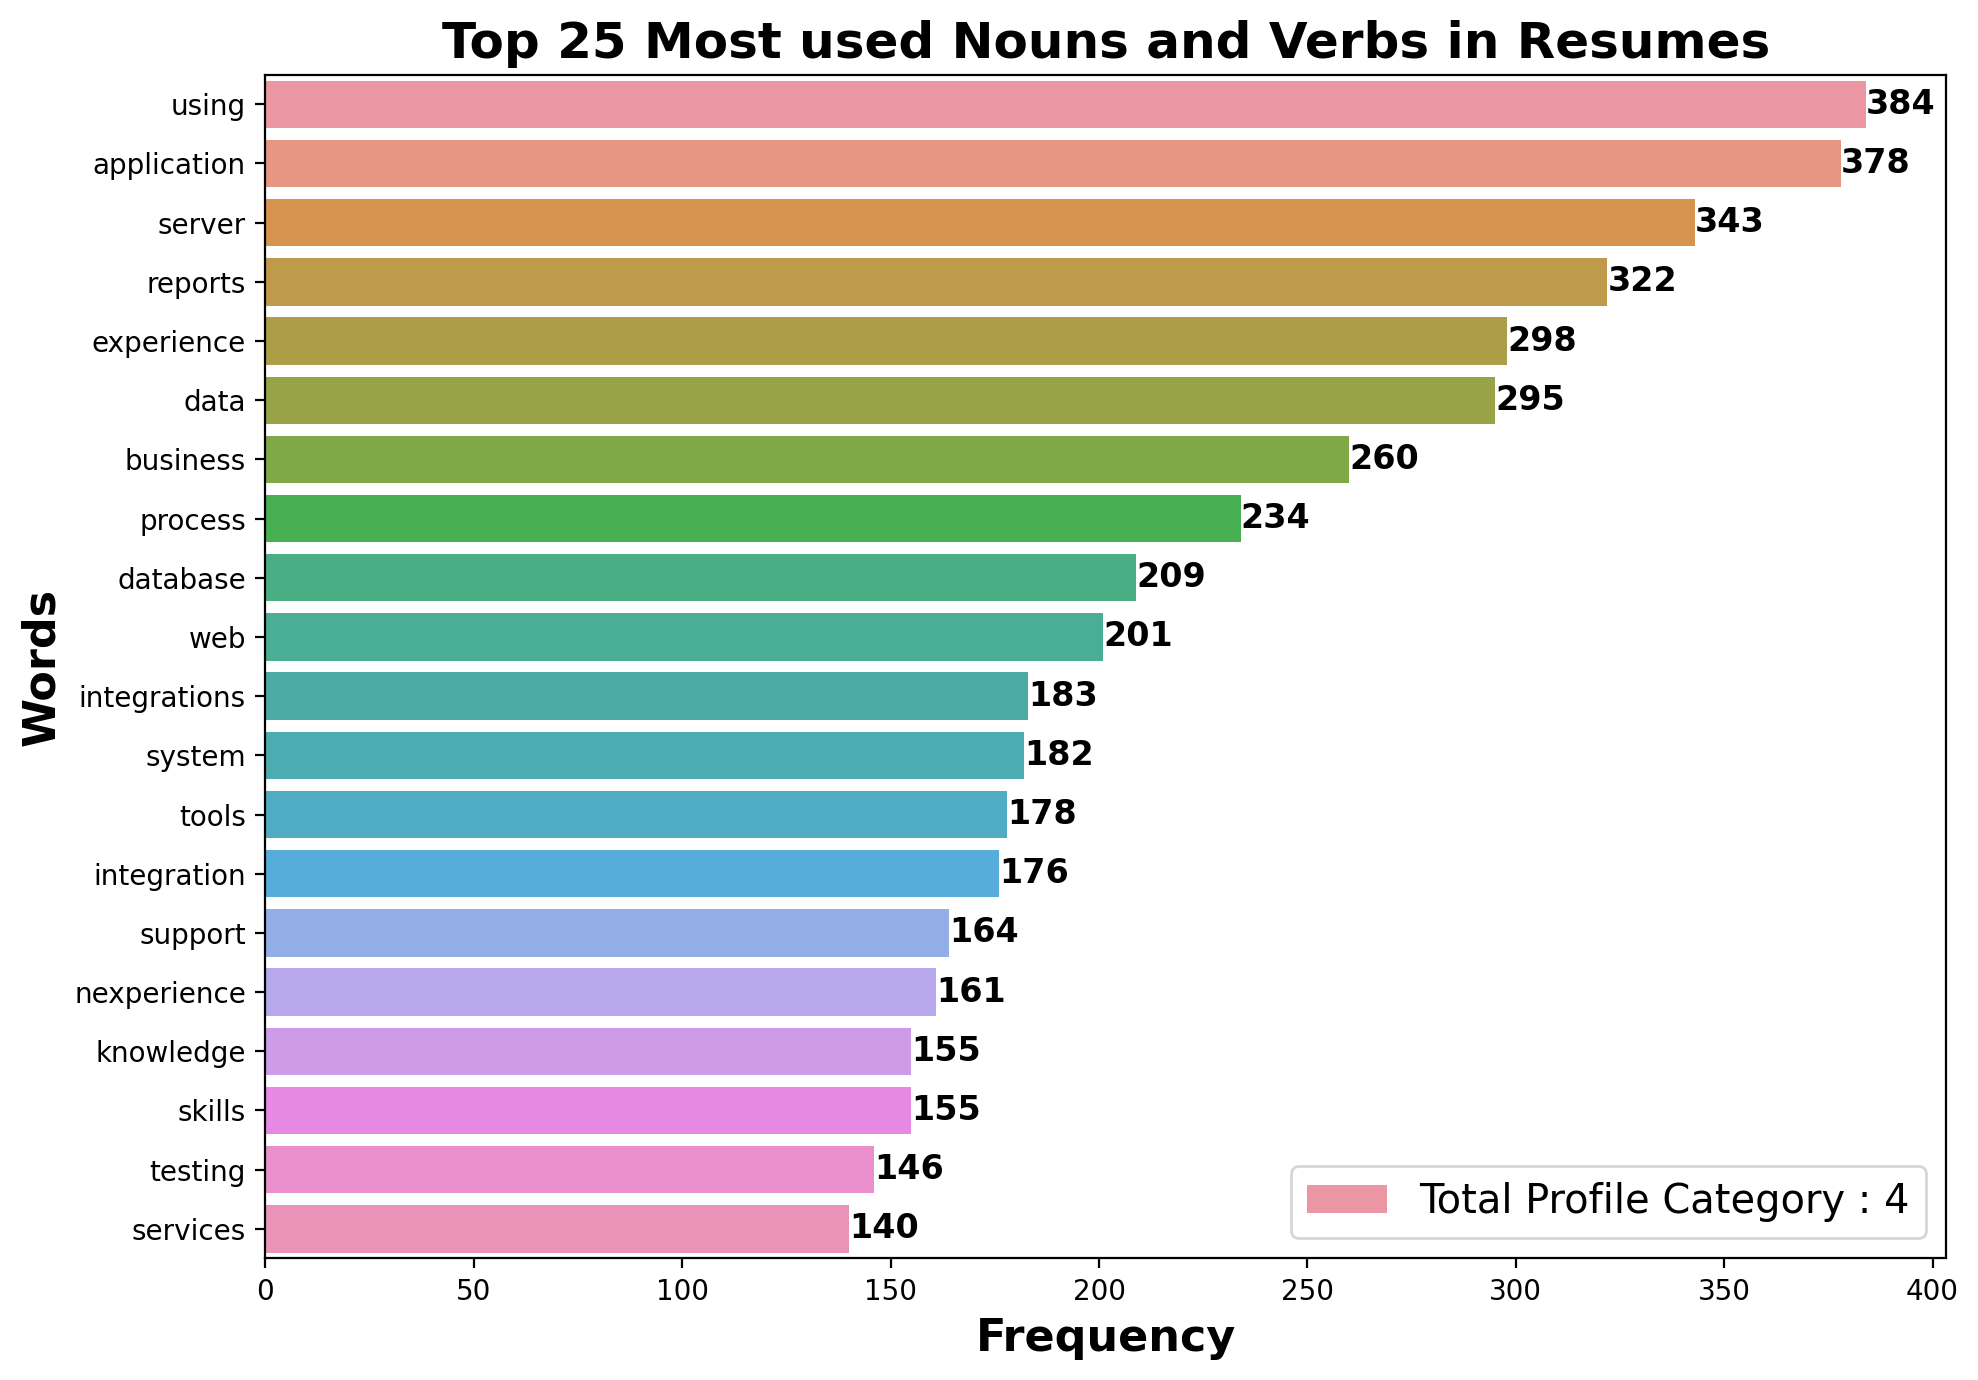

In [92]:
fig, axe = plt.subplots(1, 1, figsize = (10, 7), dpi = 200)
ax = sns.barplot(x = wd_df['Count'].head(20), y = wd_df.Words.head(20), data = wd_df, ax = axe,
                label = 'Total Profile Category : {}'.format(len(data_resume.category.unique())))

axe.set_xlabel('Frequency', size = 16, fontweight = 'bold')
axe.set_ylabel('Words', size = 16, fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc = 'best', fontsize = 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i, color = 'black', fontweight = 'bold', fontsize= 12)
  
fig.tight_layout()
plt.show()

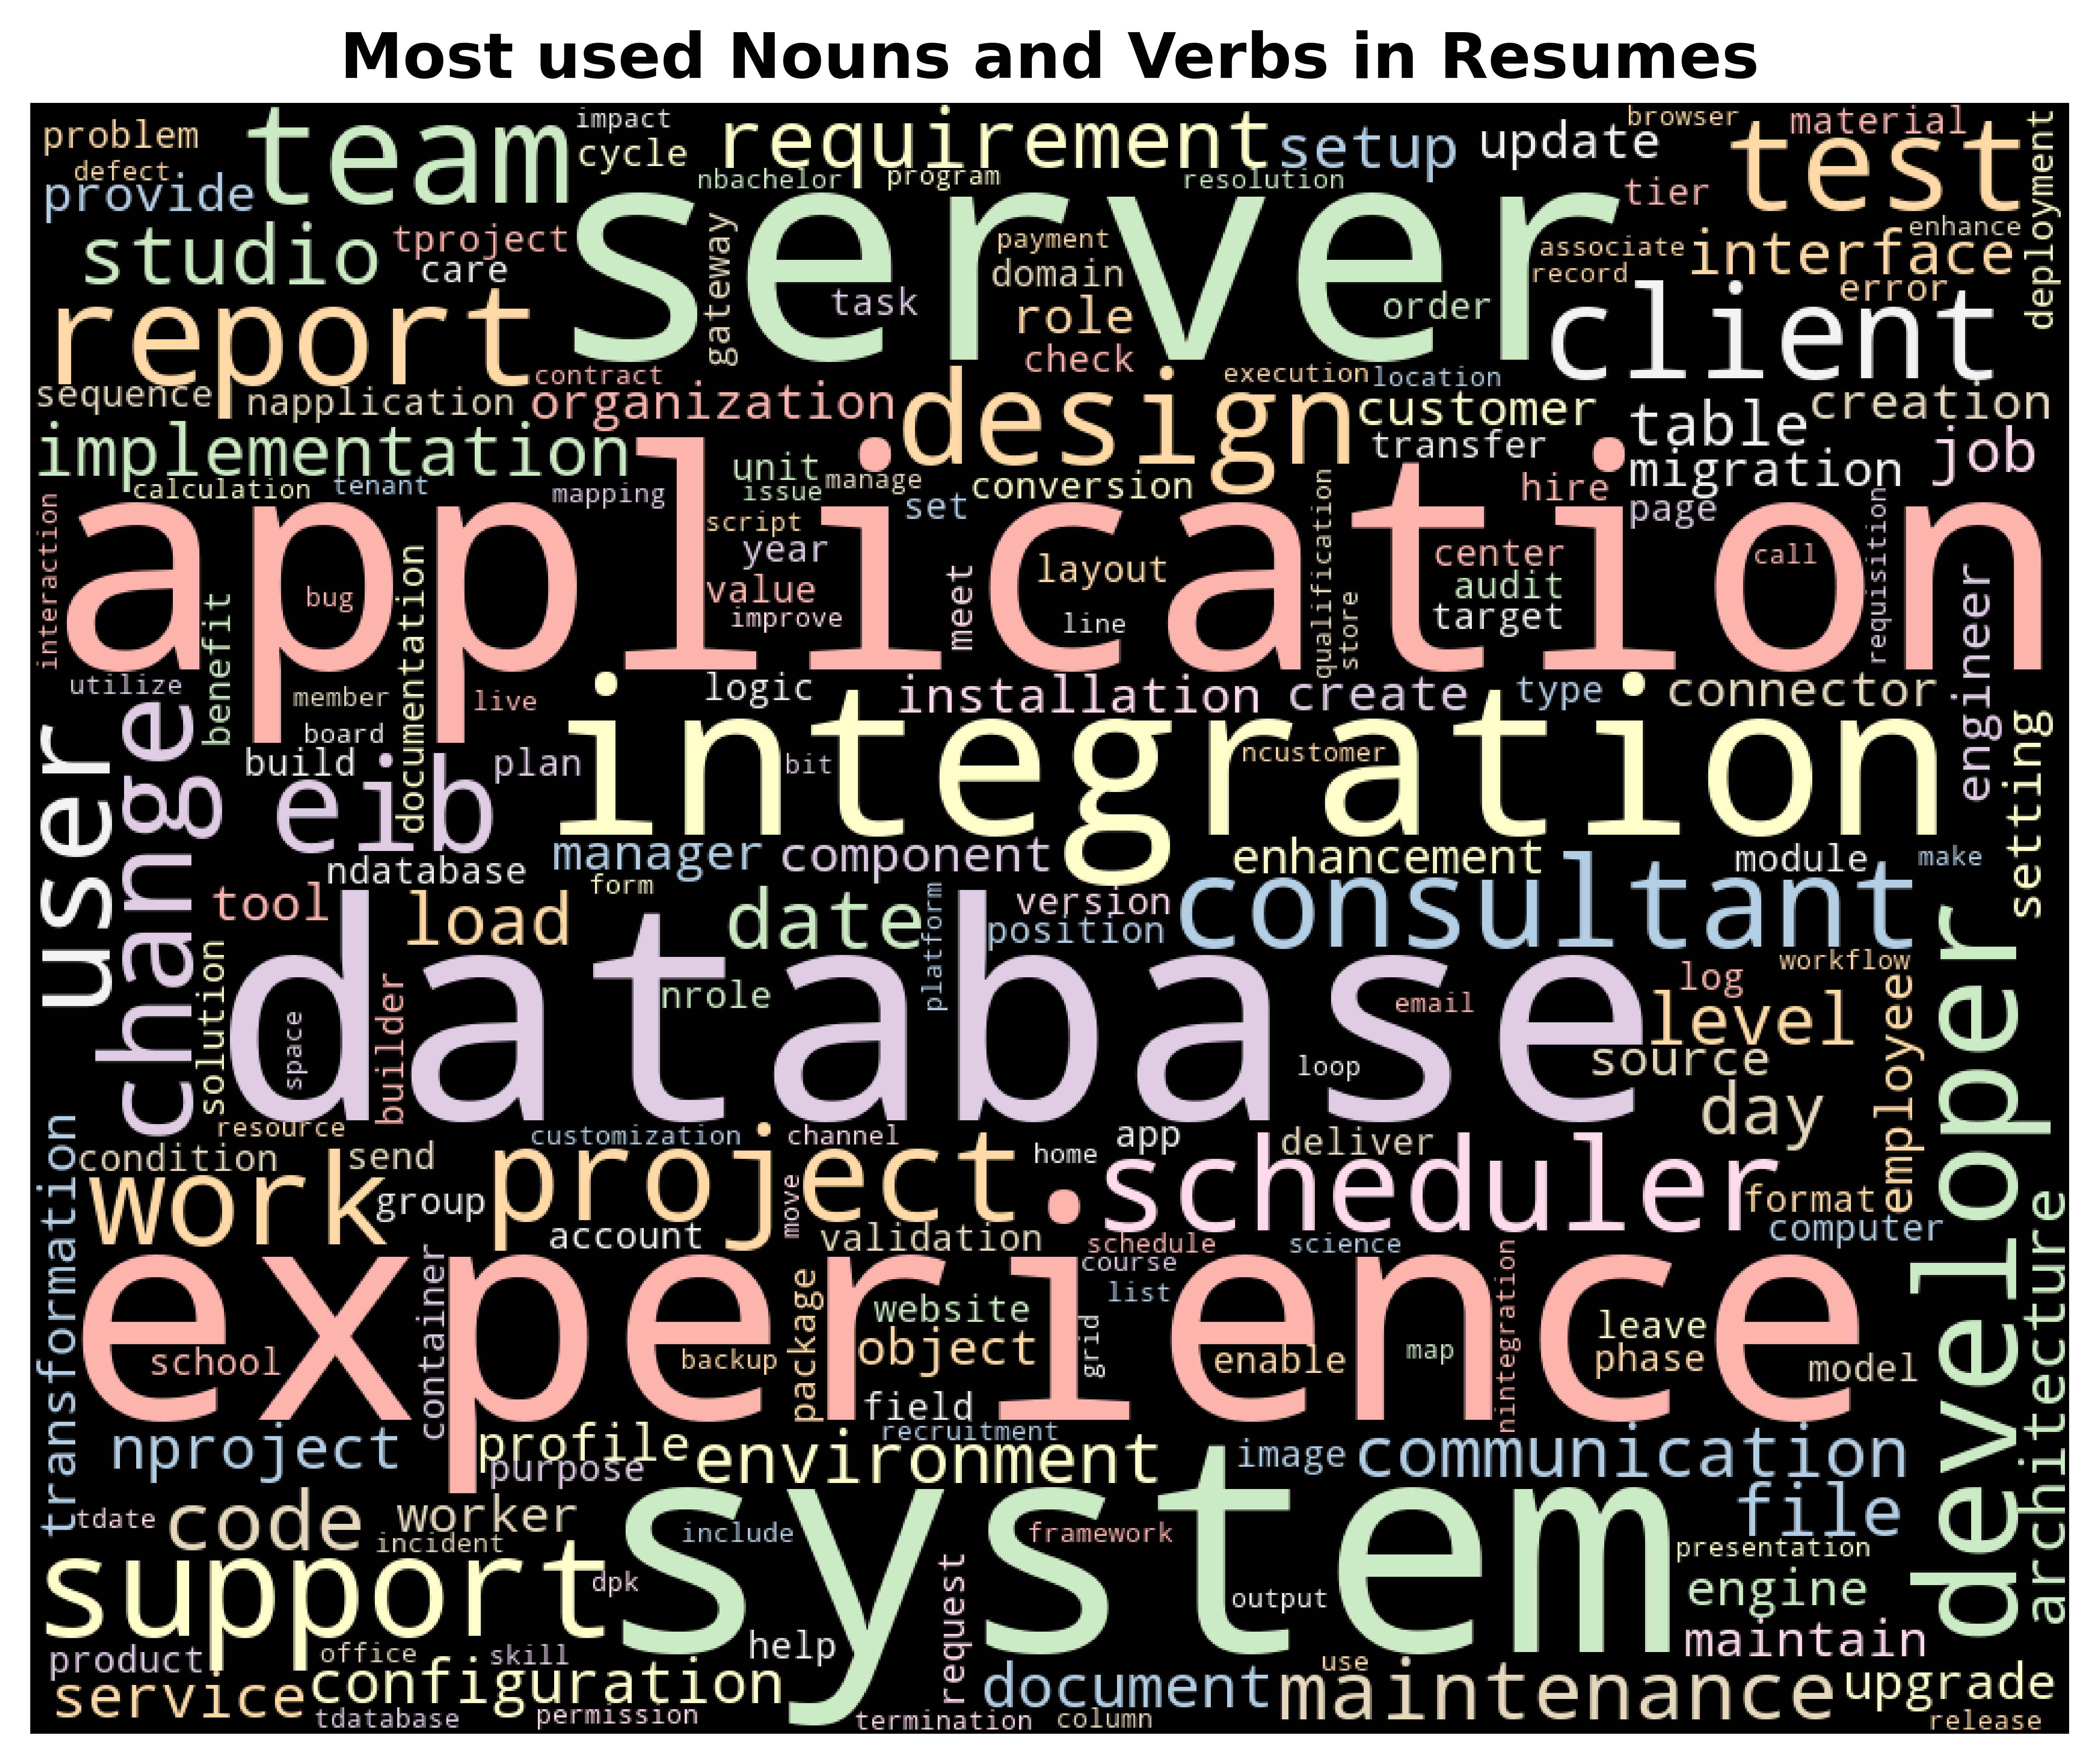

In [96]:
text = " ".join(cat for cat in wd_df.Words)
word_cloud = WordCloud(width=1000, height = 800, random_state = 10, background_color = "black", 
                      colormap = "Pastel1", collocations = False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

# word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()